# Boston Crime Data - Vandalism in 2020

In [242]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import metrics

crime_data = pd.read_csv('E:\Coursera\TabPy\TPublic\script_113631134_20210423193017_combine.csv',
                         dtype={"INCIDENT_NUMBER": object, "OFFENSE_CODE": np.int64,"OFFENSE_CODE_GROUP" : np.float64,
                               "OFFENSE_DESCRIPTION" : object,"DISTRICT" :object,"REPORTING_AREA" :object,
                               "SHOOTING" :np.int64,"OCCURRED_ON_DATE" :object,"YEAR" : np.int64,"MONTH" :np.int64,
                               "DAY_OF_WEEK" : object,"HOUR" :np.int64,"UCR_PART":np.float64,"STREET":object,
                               "Lat" : np.float64, "Long" :np.float64,"Location" :object})

# Filtering the rows with zero Lat and Long
crime_data = crime_data[(crime_data['Lat'] != 0) & (crime_data['Long'] != 0)]

In [244]:
#filtering only Vandalism events
part_data = crime_data[crime_data['OFFENSE_DESCRIPTION'].isin(['VANDALISM'])]
print(part_data.shape)

(3253, 17)


# DBSCAN - Fit the model

In [282]:
#For Haversine metric, all values hav to be in radians. 
kms_per_radian = 6371.0088
epsilon = 0.6/kms_per_radian
min_samples = 5

# Converting Lat and Long columns to radians and stacking to form an array
coords = np.column_stack([np.radians(part_data['Lat']),np.radians(part_data['Long'])])
db = DBSCAN(eps=epsilon, min_samples=min_samples,algorithm = 'ball_tree',metric = 'haversine').fit(coords)
cluster_labels = db.labels_

no_clusters = len(np.unique(cluster_labels) )
no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 9
Estimated no. of noise points: 8


In [283]:
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])
print(clusters)

0    [[0.7382316060459342, -1.240225889346713], [0....
1    [[0.7395102816783893, -1.2398695224162388], [0...
2    [[0.7391325562896537, -1.2421082863353996], [0...
3    [[0.7375530402693447, -1.2418220922594883], [0...
4    [[0.7397560960360452, -1.2392163301811485], [0...
5    [[0.737834363611327, -1.241979751537422], [0.7...
6    [[0.7380490135915806, -1.2417707183393212], [0...
7    [[0.7377659936016073, -1.2414256668683035], [0...
8                                                   []
dtype: object


In [285]:
X_df = pd.DataFrame(coords)
db_cluster = pd.DataFrame(cluster_labels)  

df = pd.concat([X_df, db_cluster], axis=1)

df.columns = ['Lat', 'Long', 'dbscan_cluster']
df['Lat'] = np.degrees(df['Lat'])
df['Long'] = np.degrees(df['Long'])
df.shape

(3253, 3)

# Plot the clusters

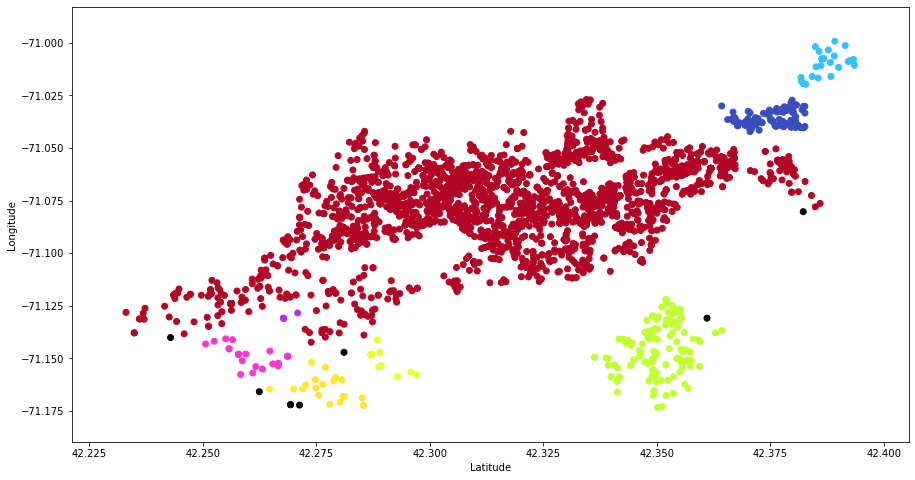

In [303]:
colors = {
  0: '#b40426',
  1: '#3b4cc0',
    2: '#C1FF33',
    3:'#FF33D4',
    4:'#33C1FF',
    5:'#FFE633',
    6:'#E6FF33',
    7:'#B233FF',
    8:'#33F3FF',
    9:'#FFCE33',
    10:'#FFAF33',
    11:'#FF9033',
  -1: '#000000'
}

colors = list(map(lambda x: colors[x], df['dbscan_cluster']))
fig, ax = plt.subplots(figsize=[15, 8])
df_scatter = ax.scatter(df['Lat'], df['Long'], c=colors)
# plt.xticks(np.arange(min(df['Lat']), max(df['Lat']), 0.0125))
# plt.yticks(np.arange(min(df['Long']), max(df['Long']), 0.0125))

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

In [287]:
print("Silhoette Coefficient: %0.3f" % metrics.silhouette_score(coords, cluster_labels))

Silhoette Coefficient: 0.183
